In [2]:
import pickle as pk
import matplotlib.pylab as plt
import numpy as np
%matplotlib nbagg


In [19]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

We load the data file obtained from Daniel, and take a look: one row will contain the data relative to one geometry: 

ast1, ast2, $t_1$, $t_2$, $m^*$, $m_i$, $\Delta V^*$, $\Delta V$, $\Delta V_L$, $\Delta V_D$, $m^*_L$, $m^*_D$

We want to learn $\Delta V$ (i.e. the final mass) from the rest. The ast1 and ast2 ids can be used with the gtoc7 asteroids to know the orbitalparameters.


In [9]:
a = pk.load(open("learn.pkl","rb"))
print("DATA = ", a)
print("ONE ROW = ", a[0])

DATA =  [[ 11830.          10256.          10962.60236546 ...,   4906.74618359
    2544.20354737   1476.60103897]
 [  6846.           6073.          11098.51009776 ...,   6586.44735414
    1251.97554234    775.87757295]
 [ 15646.           8853.          10472.90296903 ...,   4091.14474818
    2968.07001635   1992.14286758]
 ..., 
 [  4952.          14339.          10326.68381981 ...,   4057.38011553
    2788.37388882   1485.32852058]
 [ 12662.          11131.           9791.69375163 ...,   4885.57653231
    2874.03260757   2312.48314192]
 [ 14007.           7294.          10253.04425878 ...,   4728.99722101
    2062.81669447   1294.33686228]]
ONE ROW =  [ 11830.          10256.          10962.60236546  11220.6581701
   1427.64964893   1352.56164444   4894.91224655   4225.21779204
   2629.03746956   4906.74618359   2544.20354737   1476.60103897]


### Visualizing the data

We plot the data with a high alpha as to show the data density. The plots are a result of knowledge in the domain, thus manual feature engineering ...

First we plot the starting mass (fraction w.r.t the maximual allowed $m^*$) vs the $\Delta V$ (fraction w.r.t. $\Delta V^*$). This last fraction is, essentially ,the duration of the coast arc. 1 -> no coast, 0-> full coast. 
We observe that no trajectory has a $\Delta V$ higher than the one relative to maxmum mass (obvious as that correspond to no coast arc), you thus cannot thrust for longer. A strange feature that should be discussed / checked is that many trajectories show no coast arc even if they are very light.

<IPython.core.display.Javascript object>


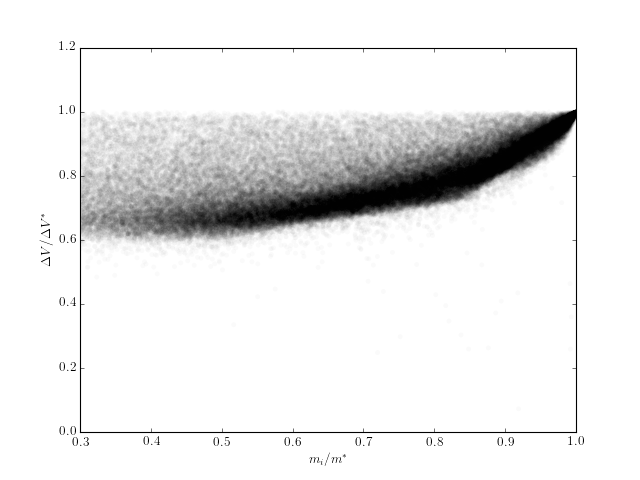

(0.3, 1)

In [44]:
plt.figure()
plt.scatter(  a[:,5]/a[:,4], a[:,7] / a[:,6], marker='o', alpha=0.02,edgecolor="none",c=np.array([a[:,5]  / max(a[:,8])]*3).transpose())
plt.xlabel("$ {m_i} / {m^*}$")
plt.ylabel("$ {\Delta V} / {\Delta V^*}$")
plt.xlim(0.3,1)

Second, we plot the starting mass (fraction w.r.t the maximual allowed $m^*$) vs the $\Delta V$ (fraction w.r.t. $\Delta V^L$). 
We observe a few low-thrust trajectories with a $\Delta V$ which is improving w.r.t Lambert. These are not extremely frequent, but correspond to cases where a two impulse orbital transfer is not optimal

<IPython.core.display.Javascript object>


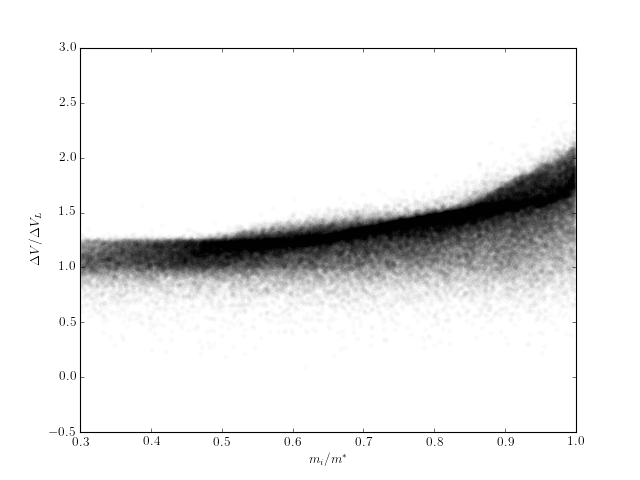

(0.3, 1)

In [43]:
plt.figure()
plt.scatter(  a[:,5]/a[:,4], a[:,7] / a[:,8], marker='o', alpha=0.02, edgecolor="none", c=np.array([a[:,5]  / max(a[:,8])]*3).transpose())
plt.xlabel("$ {m_i} / {m^*}$")
plt.ylabel("$ {\Delta V} / {\Delta V_L}$")
plt.xlim(0.3,1)

Third, we plot the starting mass (fraction w.r.t the maximual allowed $m^*$) vs $\Delta V - \Delta V_L$ (fraction w.r.t. $\Delta V^*$). 

<IPython.core.display.Javascript object>


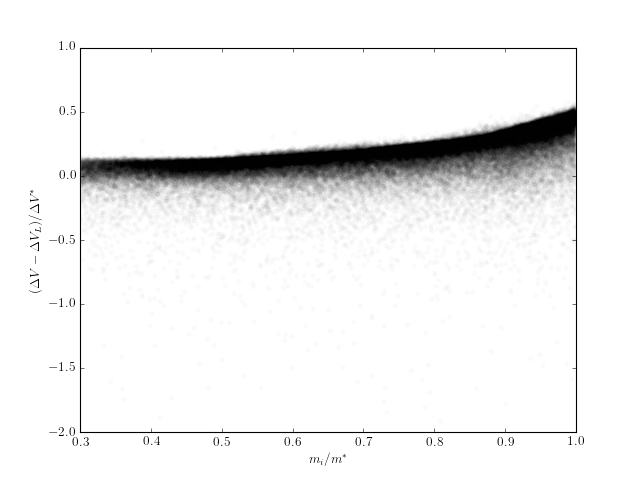

In [48]:
plt.figure()
plt.scatter(  a[:,5]/a[:,4], (a[:,7]-a[:,8]) / (a[:,6]), marker='o', alpha=0.02,edgecolor="none", c=np.array([a[:,5]  / max(a[:,8])]*3).transpose())
plt.xlim(0.3,1)
plt.ylim(-2,1)
plt.xlabel("$ {m_i} / {m^*}$")
plt.ylabel("$ {(\Delta V - \Delta V_L} ) / {\Delta V^*}$")

## Now we do some machine learning
We start from a naive approach using $\Delta V^*$, $\frac{m_i}{m^*}$, $\Delta V_L$ and $\Delta t$ to try and learn $\Delta V$ (and hence $m_f$)


In [52]:
X = list()
Y = list()
for row in a:
    X.append((row[4], row[5] / row[4], row[8], row[3] - row[2]))
    Y.append(row[7])

In [55]:
print(X[0])
print(Y[0])

(1427.6496489341298, 0.9474044598027761, 2629.0374695645951, 258.05580463910701)
4225.21779204
